In [1]:
import os
import pandas as pd 
import numpy as np
import imageio
import os
import random
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from collections import defaultdict


import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Prep the Dataset

In [6]:
!ls fer_ckplus_kdef/anger/AF01ANS.png

fer_ckplus_kdef/anger/AF01ANS.png


In [5]:
im = imageio.imread('fer_ckplus_kdef/anger/AF01ANS.png')
im

Array([[125, 129, 130, ..., 111, 129, 132],
       [128, 130, 130, ..., 129, 118, 128],
       [127, 129, 130, ..., 128, 121, 117],
       ...,
       [ 85,  74,  69, ...,  53,  55,  60],
       [ 68,  65,  63, ...,  74,  69,  61],
       [ 73,  66,  62, ...,  63,  67,  71]], dtype=uint8)

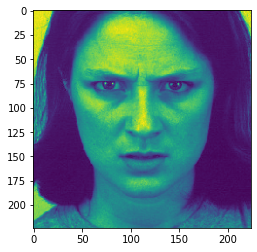

In [6]:
plt.imshow(im)

### Class Counts

In [2]:
INPUT_PATH = "fer_ckplus_kdef/"

for dir_ in os.listdir(INPUT_PATH):
    count = 0
    for f in os.listdir(INPUT_PATH + dir_ + "/"):
        count += 1
    print(f"{dir_}:   \t {count} images")

surprise:   	 4226 images
fear:   	 3454 images
contempt:   	 130 images
disgust:   	 795 images
anger:   	 4725 images
neutrality:   	 5072 images
sadness:   	 5403 images
happiness:   	 9049 images


In [39]:
for i in data:
    print(i)

surprise
fear
contempt
disgust
anger
neutrality
sadness
happiness


# Make Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

# Image Generator and Flow From Directory

In [10]:
data_dir = 'fer_ckplus_kdef/'
train_datagen = ImageDataGenerator(rescale=1.0/255., 
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                    )


train_generator = train_datagen.flow_from_directory(data_dir,
                                                    batch_size=32,
                                                    classes=['surprise',
                                                            "fear",
                                                            "contempt",
                                                            "disgust",
                                                            "anger",
                                                            "neutrality",
                                                            "sadness",
                                                            "happiness"],
                                                    class_mode="categorical",
                                                    target_size=(224, 224))

Found 32854 images belonging to 8 classes.


In [12]:
history = model.fit(train_generator,
                              epochs=1,
                              verbose=1
                              )

1027/1027 [==============================] - 1003s 976ms/step - loss: 1.7794 - acc: 0.2950


# Copy Files into Train, Val and Test Folders

In [51]:
def split_data(data_dir, train, val, test, train_size):
    """
    Inputs:The current data dir for a given class, the destination train, val and test dir. 
           PLus the ratio of train size.
    Output: Copies of the the images in the correct destination file locations.
    """
    #make list of of file names
    current_data = []
    for item in os.listdir(data_dir):
        if os.path.getsize(data_dir+item) >0:
            current_data.append(item)
        else:
            print(item, "Source is empty!")
    #shuffle the list of names
    shuff = random.sample(current_data, len(current_data))
    #split names into train, val and test
    size = int(len(current_data)*train_size)
    train_set = shuff[:size]
    val_test_set = shuff[size:]
    
    val_test_size = int(len(val_test_set) /2)
    val_set = val_test_set[:val_test_size]
    test_set = val_test_set[val_test_size:]
    
    #copy files into correct locations
    for item in train_set:
        copyfile(data_dir + item, train + item)
    for item in val_set:
        copyfile(data_dir + item, val + item)
    for item in test_set:
        copyfile(data_dir + item, test + item)


In [40]:
data_dir = 'fer_ckplus_kdef/'

classes = ['surprise',
            "fear",
            "contempt",
            "disgust",
            "anger",
            "neutrality",
            "sadness",
            "happiness"]

os.mkdir('data')
os.mkdir('data/train/')
os.mkdir('data/test/')
os.mkdir('data/val/')

for class_ in classes:
    os.mkdir(f'data/train/{class_}')
    os.mkdir(f'data/test/{class_}')
    os.mkdir(f'data/val/{class_}')

In [26]:
!ls data/val

anger  contempt  disgust  fear	happiness  neutrality  sadness	surprise


In [53]:
train_size = .9
for class_ in classes:
    data_dir = f'fer_ckplus_kdef/{class_}/'
    train_dir = f'data/train/{class_}/'
    val_dir = f'data/val/{class_}/'
    test_dir = f'data/test/{class_}/'
    split_data(data_dir, train_dir, val_dir, test_dir,  train_size)

In [54]:
check_dr = ["data/train/", "data/val/", "data/test/"]
for dr in check_dr:
    print(f"##########{dr}###########")
    for dir_ in os.listdir(dr):
        count = 0
        for f in os.listdir(dr + dir_ + "/"):
            count += 1
        print(f"{dir_}:   \t {count} images")

##########data/train/###########
surprise:   	 3803 images
fear:   	 3108 images
contempt:   	 117 images
disgust:   	 715 images
anger:   	 4252 images
neutrality:   	 4564 images
sadness:   	 4862 images
happiness:   	 8144 images
##########data/val/###########
surprise:   	 211 images
fear:   	 173 images
contempt:   	 6 images
disgust:   	 40 images
anger:   	 236 images
neutrality:   	 254 images
sadness:   	 270 images
happiness:   	 452 images
##########data/test/###########
surprise:   	 212 images
fear:   	 173 images
contempt:   	 7 images
disgust:   	 40 images
anger:   	 237 images
neutrality:   	 254 images
sadness:   	 271 images
happiness:   	 453 images


# Training With Val Set
### Train image generator and Flow

In [58]:
train_dir = f'data/train/'
train_datagen = ImageDataGenerator(rescale=1.0/255., 
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                    )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    classes=['surprise',
                                                            "fear",
                                                            "contempt",
                                                            "disgust",
                                                            "anger",
                                                            "neutrality",
                                                            "sadness",
                                                            "happiness"],
                                                    class_mode="categorical",
                                                    target_size=(224, 224))



Found 29565 images belonging to 8 classes.


### Val image generator and Flow

In [59]:
val_dir= f'data/val/'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=32,
                                                              classes=['surprise',
                                                                        "fear",
                                                                        "contempt",
                                                                        "disgust",
                                                                        "anger",
                                                                        "neutrality",
                                                                        "sadness",
                                                                        "happiness"],
                                                              class_mode="categorical",
                                                              target_size=(224, 224)
                                                             
                                                             )

Found 1642 images belonging to 8 classes.


# Train Again with Validation Set

In [61]:
history = model.fit(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)

924/924 [==============================] - 843s 912ms/step - loss: 1.7421 - acc: 0.3158 - val_loss: 1.6497 - val_acc: 0.3727
